### Saudi Arabia Real Estate(AQAR) - Capstone Project
#### By: DATA GRIP:
- Amjad Alfaqih, Areen Alshaikh, Dalia Alharbi, Sara Alhaddad.

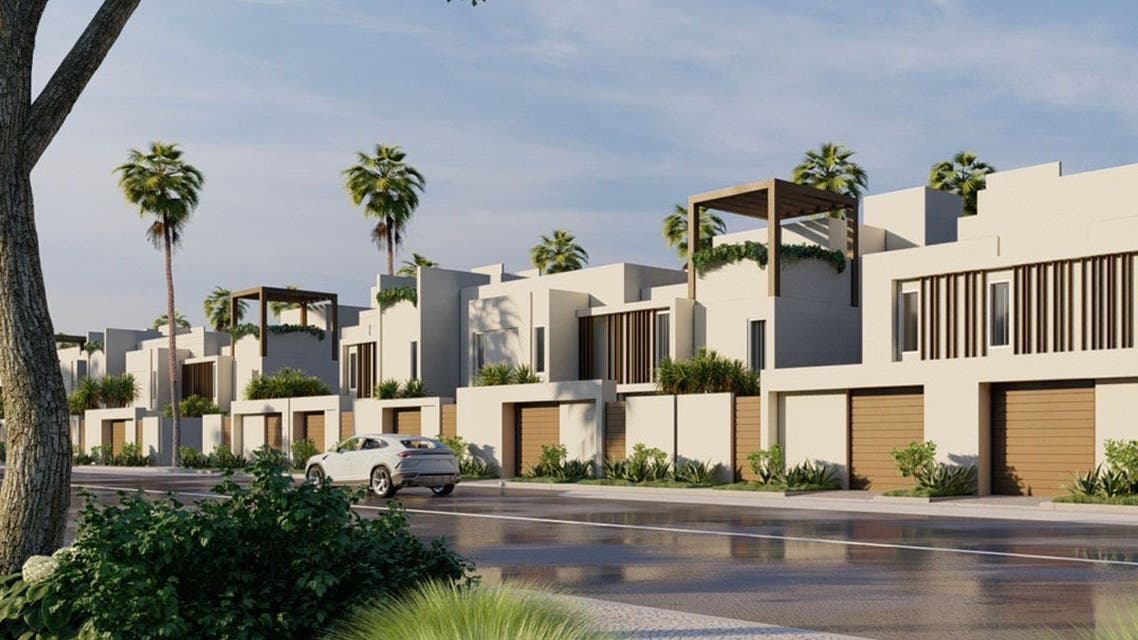

**About Dataset:**
The dataset is obtained from [Kaggle.](https://www.kaggle.com/datasets/lama122/saudi-arabia-real-estate-aqar)
- Collected and scrapped from [Aqar website.](https://sa.aqar.fm/).
- Aqar is specialized application in Saudi real estate. Shows you the properties available around you.
The goal of this statistical analysis is to help us understand the relationship between house features and how these variables are used to predict the house price.


The chosen cities are Riyadh, Jeddah, Dammam, and Khobar
- Riyadh is the capital and largest city in Saudi Arabia, with the largest municipal population in the Middle East. Riyadh has a diverse range of people and cultures, it is still growing day by day.

- Jeddah which located in the middle of the eastern coast of the red sea and is considered the economic and tourism capital of the country.

- Dammam it lies on the Persian Gulf northwest of Bahrain Island and forms a larger metropolitan and industrial complex with Khobar, Qatif, and Dhahran.

- Khobar city is one of the three main cities in the Eastern Province, the others being Dammam and Dhahran. It is developing into an important industrial city, with factories turning out industrial gas, dairy products, carbonated water, tissue paper and ready-made garments.


**Columns Definition:**
- city: city where house locate in
- district: district where house locate in
- front: What is the house front is north, west .. etc
- size: size in m^2
- propertyage: property age for the house 
- bedrooms: number of bedrooms 
- bathrooms: number of bathrooms 
- livingrooms: number of livingrooms
- kitchen: show whether the house have a kitchen or not
- garage: show whether the house have a garage or not 
- driverroom: show whether the house have a driverroom or not 
- maidroom: show whether the house have a maid_room or not
- furnished: show whether the house is furnished or not
- ac: show whether the house have a ac or not
- roof: show whether the house have a space for roof on top or not
- pool: show whether the house have a pool or not
- frontyard: show whether the house have a frontyard or not
- basement: show whether the house have a basement or not
- duplex: show whether the house is a duplex or not
- stairs: show whether the house have a stairs or not
- elevator: show whether the house have an elevator or not
- fireplace: show whether the house have a fireplace or not
- price: show the price of the house
- details: shows any additional details from the house owner about the house.

#### Our Aim is:
- Analyzing the real estate of those Saudi cities and predict prices through other features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from googletrans import Translator

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import xgboost as xgb
from sklearn.svm import SVR


# Features selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

    
#Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

#pipeline
from sklearn.pipeline import Pipeline

### PART ONE: 
***DATA DESCRIPTION AND DATA CLEANING***

* ***Import Data***

In [2]:
# Import the dataset
df_Aqar = pd.read_csv('./SA_Aqar.csv')

# Dimension of the data:
print(f'The Dataset Contain {df_Aqar.shape[0]} Rows and {df_Aqar.shape[1]} Columns')

The Dataset Contain 3718 Rows and 24 Columns


In [3]:
# Print two records 
df_Aqar.head(2)

city         district front  size  property_age  bedrooms  bathrooms  \
0   الرياض       حي العارض   شمال   250             0         5          5   
1   الرياض     حي القادسية   جنوب   370             0         4          5   

   livingrooms  kitchen  garage  ...  roof  pool  frontyard  basement  duplex  \
0            1        1       1  ...     0     0          1         0       1   
1            2        1       1  ...     0     0          1         0       0   

   stairs  elevator  fireplace  price  \
0       1         0          0  80000   
1       1         0          0  60000   

                                             details  
0  للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...  
1  *** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...  

[2 rows x 24 columns]

####  Replace Arabic words with English and save the translated file:
- translator = Translator()
- df['city'] = df['city'].apply(lambda x: translator.translate(x, dest='en').text)
- df['district'] = df['district'].apply(lambda x: translator.translate(x, dest='en').text)
- df['front'] = df['front'].apply(lambda x: translator.translate(x, dest='en').text

**Save:**
- df.to_csv("SA_Aqar-translated.csv")

In [4]:
# Import the transleated dataset
df = pd.read_csv('./SA_Aqar-translated.csv')

In [5]:
# Dimension of the data:
print(f'The Dataset Contain {df.shape[0]} Rows and {df.shape[1]} Columns')

The Dataset Contain 3718 Rows and 25 Columns


In [6]:
# print all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(2))

Unnamed: 0    city                district  front  size  property_age  \
0           0  Riyadh    Al-Arid neighborhood  North   250             0   
1           1  Riyadh  Qadisiyah neighborhood  South   370             0   

   bedrooms  bathrooms  livingrooms  kitchen  garage  driver_room  maid_room  \
0         5          5            1        1       1            0          1   
1         4          5            2        1       1            0          0   

   furnished  ac  roof  pool  frontyard  basement  duplex  stairs  elevator  \
0          0   0     0     0          1         0       1       1         0   
1          0   0     0     0          1         0       0       1         0   

   fireplace  price                                            details  
0          0  80000  للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...  
1          0  60000  *** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...

In [7]:
#Check for duplicate records
print('The datasset has',df.duplicated().sum(),'duplicate')

The datasset has 0 duplicate


In [8]:
#Check for null values
df.isna().sum()

Unnamed: 0       0
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

The data has only one columns with null values, and this column will be dropped because it is un needed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3718 non-null   int64 
 1   city          3718 non-null   object
 2   district      3718 non-null   object
 3   front         3718 non-null   object
 4   size          3718 non-null   int64 
 5   property_age  3718 non-null   int64 
 6   bedrooms      3718 non-null   int64 
 7   bathrooms     3718 non-null   int64 
 8   livingrooms   3718 non-null   int64 
 9   kitchen       3718 non-null   int64 
 10  garage        3718 non-null   int64 
 11  driver_room   3718 non-null   int64 
 12  maid_room     3718 non-null   int64 
 13  furnished     3718 non-null   int64 
 14  ac            3718 non-null   int64 
 15  roof          3718 non-null   int64 
 16  pool          3718 non-null   int64 
 17  frontyard     3718 non-null   int64 
 18  basement      3718 non-null   int64 
 19  duplex

In [10]:
# Dropping unneeded column:
df.drop(['Unnamed: 0', 'details'], axis = 1, inplace = True)

In [11]:
#Save the clean version for the dashboard
#df.to_csv("Cleaned_SA_Real_Estate.csv")

In [12]:
df.describe()

size  property_age     bedrooms    bathrooms  livingrooms  \
count   3718.000000   3718.000000  3718.000000  3718.000000  3718.000000   
mean     390.968531      5.064820     5.083916     4.606509     2.243948   
std     1565.056135      7.590427     1.230040     0.703449     0.916436   
min        1.000000      0.000000     1.000000     1.000000     1.000000   
25%      280.000000      0.000000     4.000000     4.000000     2.000000   
50%      330.000000      2.000000     5.000000     5.000000     2.000000   
75%      400.000000      7.000000     6.000000     5.000000     3.000000   
max    95000.000000     36.000000     7.000000     5.000000     5.000000   

           kitchen       garage  driver_room    maid_room    furnished  \
count  3718.000000  3718.000000  3718.000000  3718.000000  3718.000000   
mean      0.909360     0.802044     0.495697     0.795320     0.123453   
std       0.287135     0.398512     0.500049     0.403522     0.329001   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                ac         roof         pool    frontyard     basement  \
count  3718.000000  3718.000000  3718.000000  3718.000000  3718.000000   
mean      0.560785     0.521517     0.162453     0.802582     0.034158   
std       0.496358     0.499604     0.368915     0.398104     0.181660   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     0.000000   
75%       1.000000     1.000000     0.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            duplex       stairs     elevator    fireplace         price  
count  3718.000000  3718.000000  3718.000000  3718.000000  3.718000e+03  
mean      0.499462     0.814416     0.080958     0.181280  8.738797e+04  
std       0.500067     0.388823     0.272807     0.385302  7.063470e+04  
min       0.000000     0.000000     0.000000     0.000000  1.000000e+03  
25%       0.000000     1.000000     0.000000     0.000000  5.500000e+04  
50%       0.000000     1.000000     0.000000     0.000000  7.000000e+04  
75%       1.000000     1.000000     0.000000     0.000000  1.000000e+05  
max       1.000000     1.000000     1.000000     1.000000  1.700000e+06

In [13]:
df.describe(exclude = 'number')

city                   district  front
count       3718                       3718   3718
unique         4                        174     10
top     the news  King Fahd Suburb District  North
freq         976                        173    917

In [14]:
# Fixing names after the automatic translation
df.replace({'front' : {'the West' : 'West', 'Southwest' : 'South West', 'Northwest': 'North West'}},inplace = True)
df.replace({'city' : {'grandmother' : 'Jeddah', 'the news' : 'Khobar'}}, inplace = True)

In [15]:
### Removing outliers

# Define a method to remove outliers
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)
  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df

#to plot the before and after we will remove ouliers in df2
df2 = remove_outlier(df,"price")
df2 = remove_outlier(df,"size")

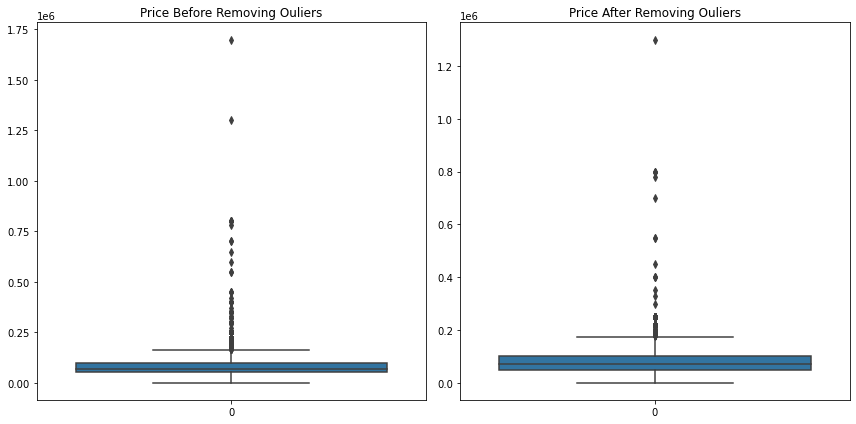

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['price'])
plt.title('Price Before Removing Ouliers')


plt.subplot(1, 2, 2)
sns.boxplot(data=df2['price'])
plt.title('Price After Removing Ouliers')
plt.tight_layout() 
plt.show()

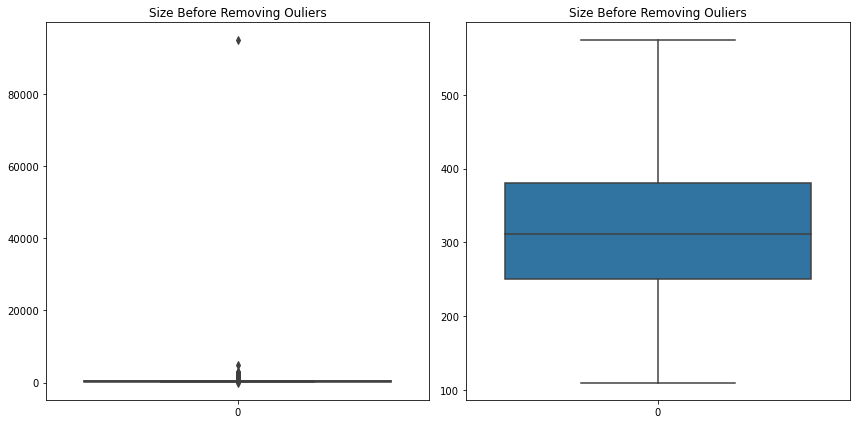

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['size'])
plt.title('Size Before Removing Ouliers')


plt.subplot(1, 2, 2)
sns.boxplot(data=df2['size'])
plt.title('Size Before Removing Ouliers')
plt.tight_layout() 
plt.show()

In [18]:
print('Dataset shape Before removing outlier:',df.shape)
print('Dataset shape After removing outlier:',df2.shape)

Dataset shape Before removing outlier: (3718, 23)
Dataset shape After removing outlier: (3362, 23)


In [19]:
#Now we can remove outliers from the original df
df =remove_outlier(df,"price")
df =remove_outlier(df,"size")

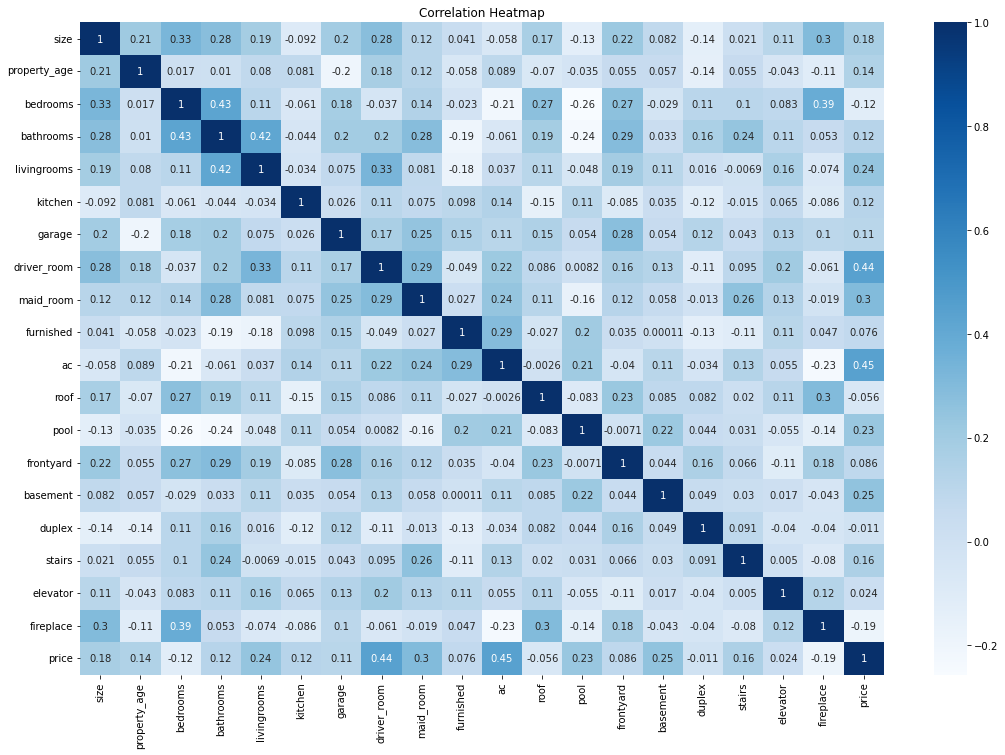

In [20]:
corrMatrix = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

The correlation matrix shows a positive correlation between our target 'Price', and other features like ac, driver room, maid room...etc.
and a negative correlation between price and fireplace, bedrooms.

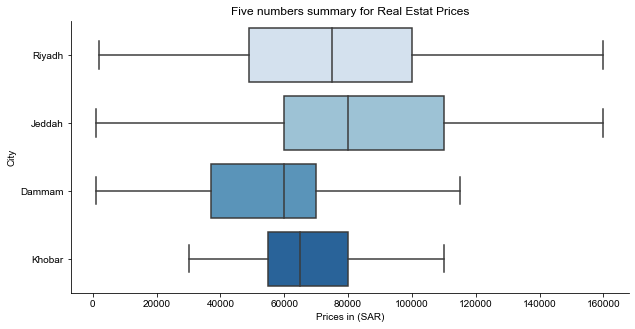

In [21]:
plt.figure(figsize=(10,5))
s = sns.boxplot(x='price',y='city', data=df, palette='Blues',showfliers=False)
plt.title('Five numbers summary for Real Estat Prices')
plt.xlabel('Prices in (SAR)')
plt.ylabel('City')
sns.set_theme(style="white")
sns.despine()
plt.show()

Box plot shows prices range in the 4 cites. for example, in Riyadh we can see the normal distribution in prices with median of 80k SAR, and 25% 50000 SAR. while 75% are approximately 100k SAR. 
In Jeddah we can see higher numbers than in Riyadh. but for Dammam and Khobar we see a lowest prices range.

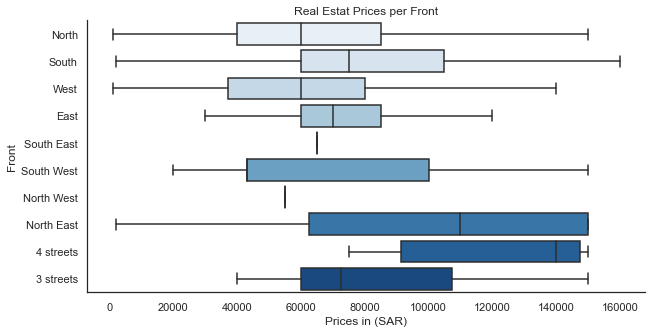

In [22]:
plt.figure(figsize=(10,5))
s = sns.boxplot(x='price',y='front', data=df, palette='Blues',showfliers=False)
plt.title('Real Estat Prices per Front')
plt.xlabel('Prices in (SAR)')
plt.ylabel('Front')
sns.set_theme(style="white")
sns.despine()
plt.show()

The box plot shows that a property with front to North East or 4 streets have the highest range in price. hence we can say that front affect property price.

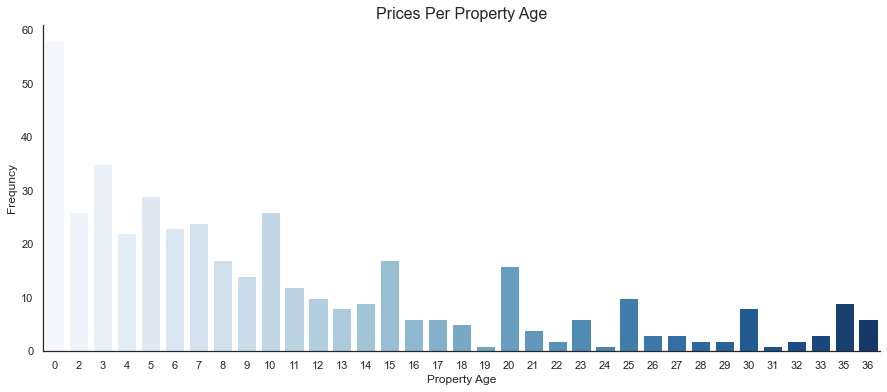

In [23]:
df3 =df.groupby(['property_age','price']).size().reset_index()

plt.figure(figsize=(15,6))
sns.countplot(data = df3, x = 'property_age', palette='Blues')
plt.title('Prices Per Property Age',fontsize=16)
plt.xlabel('Property Age')
plt.ylabel('Frequncy')
sns.set_theme(style="white")
sns.despine()
plt.show()

The count plot shows the prices frequency by property age.

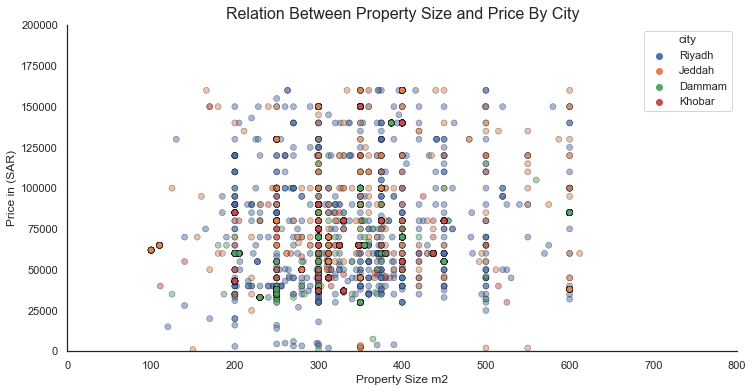

In [24]:
plt.figure(figsize=(12,6))
ax =sns.scatterplot(data=df, x='size', y='price', hue='city',
                    sizes=(20, 200), legend="full", edgecolor='black', alpha=0.5)
ax.set_xlim(0,800)
ax.set_ylim(0,200000)
plt.title('Relation Between Property Size and Price By City',fontsize=16)
plt.xlabel('Property Size m2')
plt.ylabel('Price in (SAR)')
sns.set_theme(style="white")
sns.despine()
plt.show()

We can notice the positive correlation between property size and the prices in Saudi Riyal, per each city.
and for readability we set limits for property size and price axis.

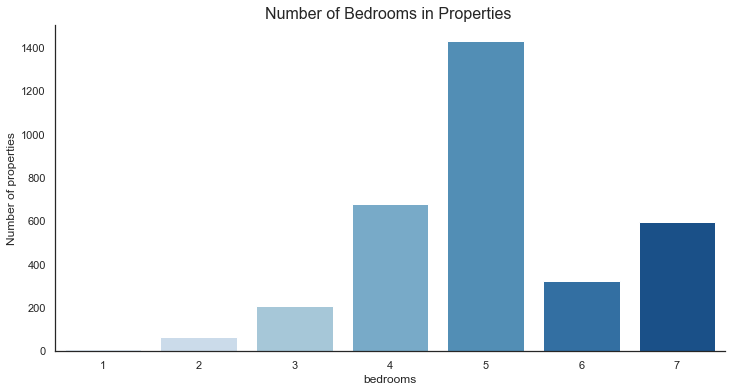

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data= df, x=df['bedrooms'],palette='Blues')
plt.title("Number of Bedrooms in Properties ",fontsize=16)
plt.ylabel('Number of properties')
sns.set_theme(style="white")
sns.despine()
plt.show()

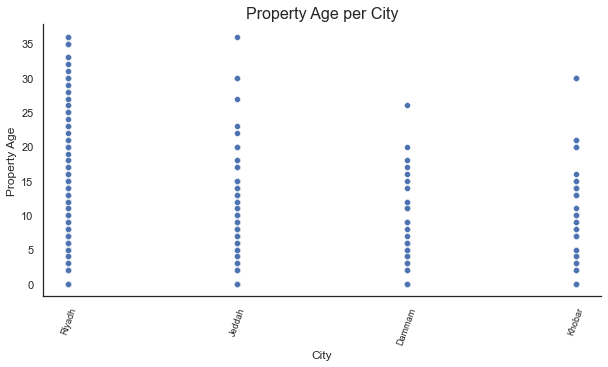

In [26]:
plt.figure(figsize=(10,5)) 
sns.scatterplot(data=df, x="city", y="property_age")
plt.xticks(rotation = 70, fontsize = 9)
plt.title('Property Age per City',fontsize=16)
plt.ylabel('Property Age')
plt.xlabel('City')
sns.set_theme(style="white")
sns.despine()
plt.show()

 The plot is showing the property age in Riyadh,Jaddah, Dammam and Khobar the highest property age is in Riyadh 
    and less property age in Dammam


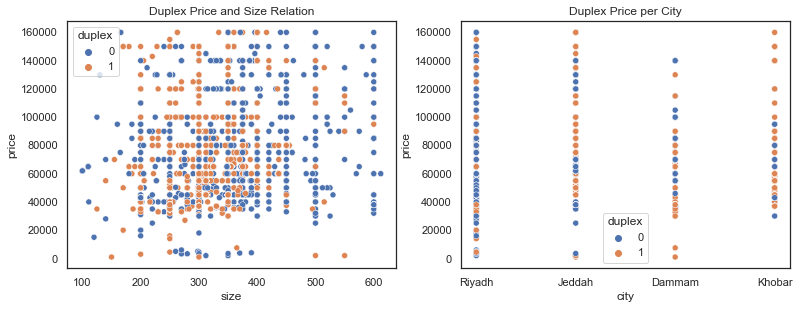

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.scatterplot(data=df, x="size", y="price", hue="duplex")
plt.title('Duplex Price and Size Relation',fontsize=12)
plt.subplot(232)
sns.scatterplot(data=df, x="city", y="price", hue="duplex")  
plt.title('Duplex Price per City',fontsize=12)
plt.show()

We used the size and city to compared between the duplex prices 

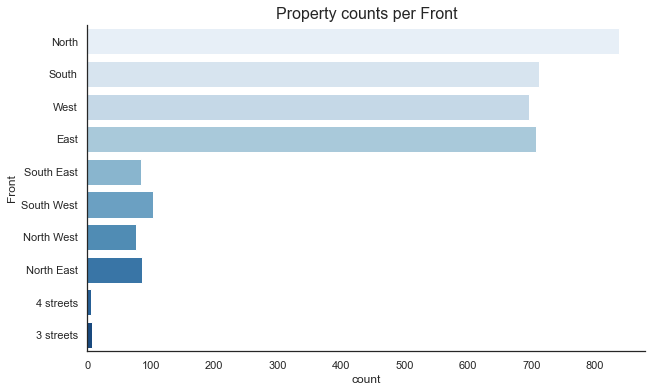

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(y = 'front', data=df, palette='Blues')
plt.title('Property counts per Front',fontsize=16)
plt.ylabel('Front')
sns.set_theme(style="white")
sns.despine()
plt.show()

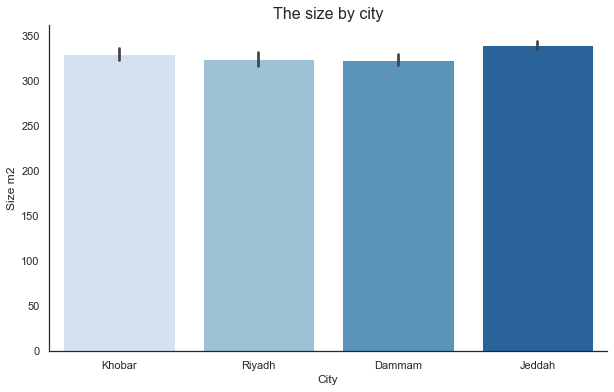

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x="city", y="size", data=df, palette="Blues")
plt.xticks([0,1,2,3],['Khobar','Riyadh', 'Dammam', 'Jeddah'],rotation=0)
plt.xlabel('City')
plt.ylabel('Size m2')
plt.title("The size by city",fontsize=16)
sns.set_theme(style="white")
sns.despine()
plt.show()

The plot is declare the sizes in different cities the highest size is in Jeddah, but mostly for the rest ot the cities they have a same range of property size.

In [31]:
#Mean of property price per city
segments= df.groupby('city')['price'].mean()
# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Property Average Price per City",
             template="seaborn",
            color_discrete_sequence=px.colors.sequential.Blues)
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

The pie chart shows the average price per city, and we can see that Jeddah has the highest prices rate, then Riyadh and Khobar. while Dammam comes last as the lowest prices. 

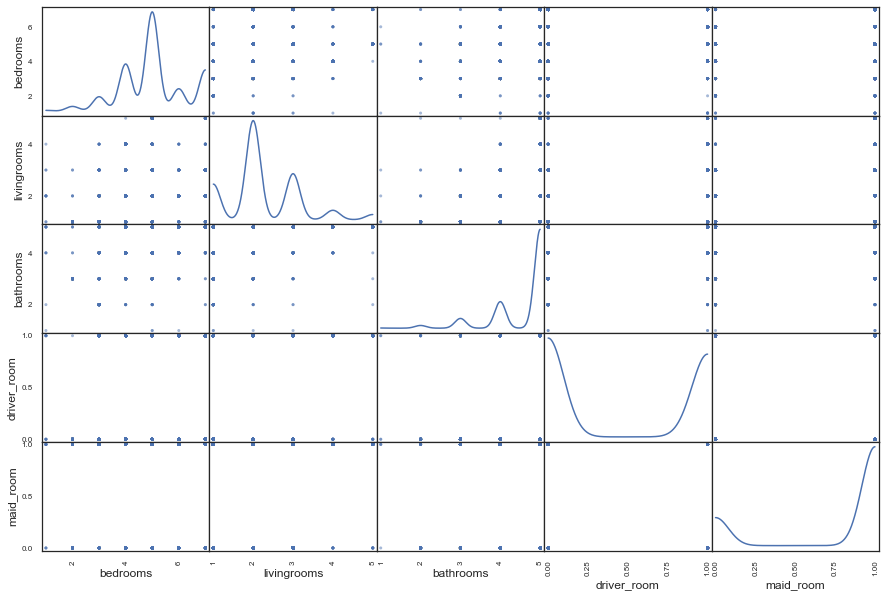

In [32]:
top_corr = df[['bedrooms', 'livingrooms', 'bathrooms', 'driver_room','maid_room']].copy()
pd.plotting.scatter_matrix(top_corr, figsize=(15,10),hist_kwds={'bins':30},diagonal='kde');

Theis matrix shows the top 5 correlated features that are expected to affect the real estate price.

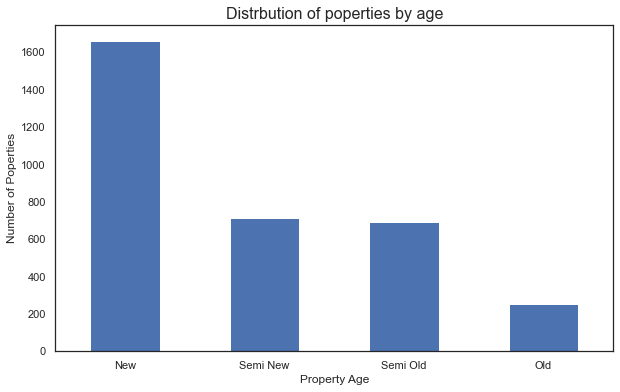

In [33]:
p_age = pd.DataFrame({"Data": df['property_age']})


def change_func(x):
    if x == 0:
        return "New"
    elif 1 < x <= 5:
        return "Semi new"
    elif 6 < x <= 15:
        return "Semi old"
    else:
        return "Old"


p_age["age"] = p_age["Data"].apply(lambda x: change_func(x))
p_age.drop(['Data'], axis = 1, inplace = True)


p_age.value_counts().plot(kind='bar',figsize=(10,6))
plt.xticks([0,1,2,3],['New','Semi New', 'Semi Old', 'Old'],rotation=0)
plt.xlabel('Property Age')
plt.ylabel('Number of Poperties')
plt.title("Distrbution of poperties by age",fontsize=16)
plt.show()


This plot shows the distrbution of availabe properteis according to its age.
New age = 0
Semi New age = 1-5 years
Semi Old = 6 - 15 years
Old = >15 years

### Features selection with SelectKBest

In [34]:
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 94.683233
Feature 1: 59.595086
Feature 2: 39.821574
Feature 3: 31.952137
Feature 4: 139.912831
Feature 5: 35.822266
Feature 6: 33.464352
Feature 7: 644.988249
Feature 8: 266.530346
Feature 9: 11.700623
Feature 10: 639.981410
Feature 11: 9.233451
Feature 12: 149.460354
Feature 13: 15.425919
Feature 14: 192.538146
Feature 15: 0.387854
Feature 16: 75.302043
Feature 17: 0.504129
Feature 18: 112.395245
Feature 19: 147.405810
Feature 20: 133.020524
Feature 21: 0.846316
Feature 22: 5.386716
Feature 23: 0.208209
Feature 24: 10.931836
Feature 25: 1.154821
Feature 26: 22.734401
Feature 27: 48.102426
Feature 28: 10.293771
Feature 29: 109.253240
Feature 30: 0.679751
Feature 31: 1.551421
Feature 32: 25.775714


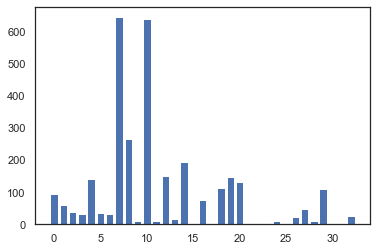

In [45]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

- Note: we wrote the above block of codes after selecting all features, splitting the data and building our models, then for the sake of optimizing the process of feature selection we tried this approach. just to find out, It doesn't really gave the best features for our purpose of price prediction.

### PART TWO: MODLING

### Feature Engniering

In [35]:
#Dummies for the categorical variables

In [36]:
pd.get_dummies(df['city']).head(2)

Dammam  Jeddah  Khobar  Riyadh
0       0       0       0       1
1       0       0       0       1

In [37]:
pd.get_dummies(df['front']).head(2)

3 streets  4 streets  East  North  North East  North West  South  \
0          0          0     0      1           0           0      0   
1          0          0     0      0           0           0      1   

   South East  South West  West  
0           0           0     0  
1           0           0     0

In [38]:
pd.get_dummies(df['district']).head(2)

Al Alia District  Al Amwaj District  Al Anwar District  \
0                 0                  0                  0   
1                 0                  0                  0   

   Al Areej Al Gharbia Naghbarhad  Al Badiah District  Al Bawadi dystorka  \
0                               0                   0                   0   
1                               0                   0                   0   

   Al Faisaliah neighborhood  Al Falah District  Al Ha'ir District  \
0                          0                  0                  0   
1                          0                  0                  0   

   Al Hamdaniyah Naghbarhad  ...  safety district  \
0                         0  ...                0   
1                         0  ...                0   

   sailed the southern district  sailed to the north of naghbarhad  \
0                             0                                  0   
1                             0                                  0   

   sand district  seagull nagbarhad  ship district  tattoo ngbrhd  \
0              0                  0              0              0   
1              0                  0              0              0   

   the adjective of dysregulation  the happiness neighborhood  torch district  
0                               0                           0               0  
1                               0                           0               0  

[2 rows x 165 columns]

In [39]:
# Get dummies values for the categorical coulmns and merge them with the data frame after droping the original ones
df_final = pd.concat([df.drop(['district','front','city'], axis = 1),
                              pd.get_dummies(df['city']),pd.get_dummies(df['front'])], axis=1)
df_final

size  property_age  bedrooms  bathrooms  livingrooms  kitchen  garage  \
0      250             0         5          5            1        1       1   
1      370             0         4          5            2        1       1   
2      380             0         4          5            1        1       1   
3      250             0         5          5            3        0       1   
4      400            11         7          5            2        1       1   
...    ...           ...       ...        ...          ...      ...     ...   
3713   437             0         7          5            2        1       1   
3714   400             0         5          5            3        0       1   
3715   330             0         6          4            2        1       0   
3716   300            13         6          5            2        1       1   
3717   437             0         7          5            2        0       1   

      driver_room  maid_room  furnished  ...  3 streets  4 streets  East  \
0               0          1          0  ...          0          0     0   
1               0          0          0  ...          0          0     0   
2               1          1          0  ...          0          0     0   
3               1          1          0  ...          0          0     0   
4               1          1          0  ...          0          0     0   
...           ...        ...        ...  ...        ...        ...   ...   
3713            0          1          0  ...          0          0     0   
3714            0          1          0  ...          0          0     0   
3715            0          0          0  ...          0          0     0   
3716            1          1          0  ...          0          0     0   
3717            0          1          0  ...          0          0     0   

      North  North East  North West  South  South East  South West  West  
0         1           0           0      0           0           0     0  
1         0           0           0      1           0           0     0  
2         0           0           0      1           0           0     0  
3         0           0           0      0           0           0     1  
4         0           0           0      0           0           0     1  
...     ...         ...         ...    ...         ...         ...   ...  
3713      0           0           0      0           0           0     1  
3714      0           0           0      1           0           0     0  
3715      0           0           0      0           0           0     1  
3716      0           0           0      1           0           0     0  
3717      0           0           0      0           0           0     1  

[3320 rows x 34 columns]

In [40]:
# Our dataset now increased into 34 columns
df_final.shape

(3320, 34)

In [41]:
#Reorder columns
df_final = df_final[['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms',
       'kitchen', 'garage', 'driver_room', 'maid_room', 'furnished', 'ac',
       'roof', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 'elevator',
       'fireplace', 'Dammam', 'Jeddah', 'Khobar', 'Riyadh',
       '3 streets', '4 streets', 'East', 'North', 'North East', 'North West',
       'South', 'South East', 'South West', 'West','price']]

#  Models With All Features

In [42]:
#Selecting X and y features
X = df_final.drop(['price'], axis=1)
y = df_final.price

In [43]:
# Split the dataset into tarin and test  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Check the length of the resulted subsets
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('-'*25)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (2656, 33)
y_train shape: (2656,)
-------------------------
X_test shape: (664, 33)
y_test shape: (664,)


### Feature Scaling

In [46]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [47]:
# Train the model
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=y_test, y_pred=lr_preds))) 

R sequared Score: 0.47


### Logistic Regression

In [48]:
lg = LogisticRegression( max_iter= 1000) 

lg.fit(X_train_scaled, y_train) 
lg_preds = lg.predict(X_test_scaled)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=y_test, y_pred=lg_preds)))

R sequared Score: 0.53


### k-nearest Neighbors Regressor

In [49]:
#n_neighborsint, default=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=y_test, y_pred=knn_preds)))

R sequared Score: 0.64


### Random Forest Regressor

In [50]:
reg_forest = RandomForestRegressor(n_estimators = 12, random_state = 42, criterion='squared_error')

reg_forest.fit(X_train, y_train)
preds_forest = reg_forest.predict(X_test)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=y_test, y_pred=preds_forest)))

R sequared Score: 0.72


In [51]:
# Score of train and test sets
score_on_train = reg_forest.score(X_train, y_train)
score_on_test = reg_forest.score(X_test, y_test)
print(score_on_train)
print(score_on_test)

0.9507074225651775
0.7184519533323981


### Decision Tree Regressor

In [52]:
reg_tree = DecisionTreeRegressor(random_state = 42, max_depth= 4, criterion='squared_error')

reg_tree.fit(X_train, y_train)

preds_tree = reg_tree.predict(X_test)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=y_test, y_pred=preds_tree)))

R sequared Score: 0.55


### XGBoost
-Linear base learner 

In [53]:
# Convert the training and testing sets into DMatrixes
df_train = xgb.DMatrix(data=X_train, label=y_train)
df_test = xgb.DMatrix(data=X_test, label=y_test)

# Parameters with booster as gblinear for Linear base learner
params = {"booster": "gblinear", "objective": "reg:squarederror"}
xg_reg = xgb.train(params=params, dtrain=df_train, num_boost_round=5)

# Making predictions
predictions = xg_reg.predict(df_test)
print('R sequared Score: {:.2f}'.format(r2_score(y_true=y_test, y_pred=predictions)))

R sequared Score: 0.37


### Support Vector Regression

In [54]:
reg_svr = SVR(kernel = 'linear')
reg_svr.fit(X_train, y_train)

preds_svr = reg_svr.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=preds_svr)
print('R sequared Score: {:.2f}'.format(r2_score(y_true=y_test, y_pred=preds_svr)))

R sequared Score: 0.03


#  Regression With Selected Features

In [55]:
# Correlated columns with price, we will choose only the highest "positive and negative" features.
numeric_columns=df_final.select_dtypes(include=[np.number])
corr=numeric_columns.corr()
print(corr['price'].sort_values(ascending=False))

price           1.000000
ac              0.445123
driver_room     0.443963
maid_room       0.302379
basement        0.254777
livingrooms     0.239986
pool            0.233973
Jeddah          0.212184
South           0.197278
size            0.179532
stairs          0.160606
North East      0.147179
property_age    0.142279
bathrooms       0.117043
kitchen         0.116730
garage          0.109180
frontyard       0.086338
furnished       0.076449
4 streets       0.061030
Riyadh          0.046653
elevator        0.024325
3 streets       0.017398
duplex         -0.010622
Khobar         -0.014675
South East     -0.016958
East           -0.021712
South West     -0.030463
North West     -0.055776
roof           -0.056249
North          -0.091523
West           -0.105612
bedrooms       -0.117205
fireplace      -0.187551
Dammam         -0.228102
Name: price, dtype: float64


- Split the data again with selected features

In [56]:
X0 = df_final.drop(['bedrooms', 'bathrooms', 'kitchen', 'garage','roof', 'frontyard', 'duplex',
       'stairs', 'elevator', 'fireplace', 'price',
       'Riyadh', 'Khobar',
       '4 streets', 'East', 'North', 'North East',
       'North West', 'South', 'South East', 'South West',
       'West'], axis=1)
y0 = df_final.price

In [57]:
#Split the dataset into tarin and test  
Xtrain, Xtest, ytrain, ytest = train_test_split(X0, y0, test_size=0.2, random_state=42)

In [58]:
# Check the length of the resulted subsets
print('X_train shape:',Xtrain.shape)
print('y_train shape:',ytrain.shape)
print('-'*25)
print('X_test shape:',Xtest.shape)
print('y_test shape:',ytest.shape)

X_train shape: (2656, 12)
y_train shape: (2656,)
-------------------------
X_test shape: (664, 12)
y_test shape: (664,)


In [59]:
Xtrain.head()

size  property_age  livingrooms  driver_room  maid_room  furnished  ac  \
3070   300            13            2            1          1          0   1   
521    246             0            2            0          0          0   0   
2362   250             0            2            0          0          0   0   
3038   312             0            3            0          0          0   0   
601    200            24            2            0          0          0   0   

      pool  basement  Dammam  Jeddah  3 streets  
3070     0         0       0       0          0  
521      0         0       0       0          0  
2362     0         0       1       0          0  
3038     0         0       0       0          0  
601      0         0       0       0          0

In [60]:
y_train.head()

3070    90000
521     40000
2362    35000
3038    45000
601     20000
Name: price, dtype: int64

#### Scaling the selected features

In [61]:
# Instantiate Scaler Object
scaler = StandardScaler()

Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

### Linear Regression

In [62]:
lr2 = LinearRegression()
lr2.fit(Xtrain_scaled, ytrain)
lr_preds2 = lr2.predict(Xtest_scaled)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=ytest, y_pred=lr_preds2)))

R sequared Score: 0.43


### Logistic Regression

In [63]:
lg2 = LogisticRegression( max_iter= 1000) 

lg2.fit(Xtrain_scaled, ytrain) 
lg2_preds = lg2.predict(Xtest_scaled)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=ytest, y_pred=lg2_preds)))

R sequared Score: 0.35


### K Neighbors Regressor

In [64]:
knn2 = KNeighborsRegressor(n_neighbors=7)
knn2.fit(Xtrain_scaled, ytrain)
knn_preds2 = knn2.predict(Xtest_scaled)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=ytest, y_pred=knn_preds2)))

R sequared Score: 0.69


### Random Forest Regressor

In [65]:
reg_forest2 = RandomForestRegressor(n_estimators = 10, random_state = 42, criterion='squared_error')

reg_forest2.fit(Xtrain, ytrain)

preds_forest2 = reg_forest2.predict(Xtest)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=ytest, y_pred=preds_forest2)))

R sequared Score: 0.68


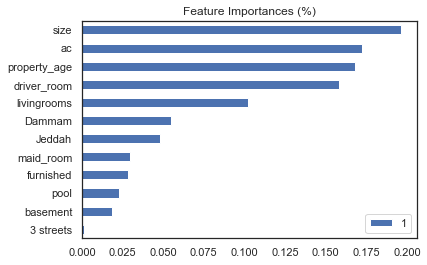

In [66]:
# Plot Feature Importances to Visualize better
pd.DataFrame(dict(zip(Xtrain.columns, reg_forest2.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

###  Decision Tree Regressor

In [67]:
reg_tree2 = DecisionTreeRegressor(random_state = 42, max_depth= 5, criterion='squared_error')

reg_tree2.fit(Xtrain, ytrain)

preds_tree2 = reg_tree2.predict(Xtest)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=ytest, y_pred=preds_tree2)))

R sequared Score: 0.62


### XGBoost
- Linear base learner 

In [68]:
# Convert the training and testing sets into DMatrixes
df_train2 = xgb.DMatrix(data=Xtrain, label=ytrain)

df_test2 = xgb.DMatrix(data=Xtest, label=ytest)

# Parameters with booster as gblinear for Linear base learner
params = {"booster": "gblinear", "objective": "reg:squarederror"}

# Train the model
xg_reg2 = xgb.train(params=params, dtrain=df_train2, num_boost_round=5)
# Making predictions
xg_preds = xg_reg2.predict(df_test2)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=ytest, y_pred=xg_preds)))

R sequared Score: 0.42


### Support Vector Regression

In [69]:
reg_svr2 = SVR(kernel = 'linear')
reg_svr2.fit(Xtrain, ytrain)

preds_svr2 = reg_svr2.predict(Xtest)

print('R sequared Score: {:.2f}'.format(r2_score(y_true=ytest, y_pred=preds_svr2)))

R sequared Score: 0.01


# Models Evaluation

In [70]:
# Calculates the cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mae = mean_absolute_error(y_true, y_predict)
    mape = mean_absolute_percentage_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    
    
    # Round the numbers for readability 
    ls = [round(mae,2), round(mape,3), round(rmse,2)]
    ls2 = ["MAE",'MAPE', "RMSE"]
    
    for x in range(len(ls)):
        result_dict[ls2[x]] = ls[x]
    
    return result_dict


print('\033[1m'+ "Models Evaluation for All Features")
print("-"*80+ '\033[0m')

# The baseline model: replace values by the mean and calculate the cost functions
b_preds = [y_test.mean() for x in range(len(y_test))]

scores_ls = [calc_cost(y_test, b_preds),
             calc_cost(y_test, lr.predict(X_test_scaled)),
             calc_cost(y_test, lg.predict(X_test_scaled)),
             calc_cost(y_test, knn.predict(X_test_scaled)),
             calc_cost(y_test, reg_forest.predict(X_test)),
             calc_cost(y_test, reg_tree.predict(X_test)),
             calc_cost(y_test, xg_reg.predict(df_test)),
             calc_cost(y_test, reg_svr.predict(X_test))]

res_df = pd.DataFrame(scores_ls).transpose()
res_df.columns=["Baseline", "Linear Regression", "Logistic Regressor", "KNN Regressor",
                "Random Forest", "Decision Tree Regressor", "XGBoost Regressor", "SVR Regressor"]

res_df

Models Evaluation for All Features
--------------------------------------------------------------------------------


Baseline  Linear Regression  Logistic Regressor  KNN Regressor  \
MAE   26280.540          17958.040           11101.200       9835.370   
MAPE      0.562              0.401               0.194          0.252   
RMSE  33311.610          24204.110           22766.490      20005.980   

      Random Forest  Decision Tree Regressor  XGBoost Regressor  SVR Regressor  
MAE        8442.900                15791.830          20445.810       24790.85  
MAPE          0.216                    0.358              0.466           0.50  
RMSE      17675.500                22435.930          26477.160       32844.36

In [71]:
#Actual value and the predicted value for Random forest model
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': preds_forest})
mlr_diff.head()

Actual value  Predicted value
1524        150000    150000.000000
2613         60000     60000.000000
2961         85000     85000.000000
912          75000     61694.416667
3634        150000    150000.000000

In [72]:
# Calculates the cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mae = mean_absolute_error(y_true, y_predict)
    mape = mean_absolute_percentage_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    
    # Round the numbers for readability 
    ls = [round(mae), mape, round(rmse)]
    ls2 = ["MAE",'MAPE', "RMSE"]
    
    for x in range(len(ls)):
        result_dict[ls2[x]] = ls[x]
    
    return result_dict


print('\033[1m'+ 'Models Evaluation For Selected Features')
print("-"*80+ '\033[0m')

#Basline model 
b_preds2 = [ytest.mean() for x in range(len(ytest))]

#Create a list of cost function resluts
scores2_ls = [calc_cost(ytest, b_preds2),
             calc_cost(ytest, lr2.predict(Xtest_scaled)),
             calc_cost(ytest, lg2.predict(Xtest_scaled)),
             calc_cost(ytest, knn2.predict(Xtest_scaled)),
             calc_cost(ytest, reg_forest2.predict(Xtest)),
             calc_cost(ytest, reg_tree2.predict(Xtest)),
             calc_cost(ytest, xg_reg2.predict(df_test2)),
             calc_cost(ytest, reg_svr2.predict(Xtest))]

#Create a dataframe of the list
res2_df = pd.DataFrame(scores2_ls).transpose()
res2_df.columns=["Baseline", "Linear Regression", "Logistic Regressor", "KNN Regressor",
                "Random Forest", "Decision Tree Regressor", "XGBoost Regressor", "SVR Regressor"]

res2_df

Models Evaluation For Selected Features
--------------------------------------------------------------------------------


Baseline  Linear Regression  Logistic Regressor  KNN Regressor  \
MAE   26281.000000        18621.00000         15726.00000    9040.000000   
MAPE      0.562042            0.39743             0.34224       0.237399   
RMSE  33312.000000        25169.00000         26920.00000   18560.000000   

      Random Forest  Decision Tree Regressor  XGBoost Regressor  SVR Regressor  
MAE     9061.000000             13423.000000       19286.000000   25041.000000  
MAPE       0.236782                 0.319929           0.416341       0.497445  
RMSE   18760.000000             20522.000000       25475.000000   33200.000000

## Hyperparameter tuning for Random Forest Regressor

In [73]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [74]:
rfr = RandomForestRegressor(random_state = 42)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [75]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 15}


## Hyperparameter tuning for XGBoost 

In [76]:
# Grid Search Parameters
grid_search_params = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [100],
    'subsample': [0.2, 0.5, 0.8],
    'max_depth': [2, 3, 5]
}

In [77]:
xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")

In [78]:
grid = GridSearchCV( estimator = xg_grid_reg,
                    param_grid = grid_search_params,
                    scoring = 'neg_mean_squared_error',
                    cv = 4, verbose = 1)

In [79]:
grid.fit(X, y)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [80]:
grid.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.2}

In [81]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Pipelines 

In [82]:
#RF
rf_Reg = Pipeline(steps=[('RFregressor', RandomForestRegressor(random_state=42, n_estimators = 15, 
                                                               bootstrap= True, 
                                                               max_depth= None, max_features= 'log2'))])        

#XGB
xg_Reg = Pipeline(
    steps=[
        ('XGBregressor', xgb.XGBRegressor(objective= "reg:squarederror", colsample_bytree= 0.3,
 learning_rate= 0.1,
 max_depth= 5,
 n_estimators= 100,
 subsample= 0.2))
    ]
)


rf_Reg.fit(X_train, y_train)
xg_Reg.fit(X_train, y_train)


Pipeline(steps=[('XGBregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.3, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=5, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [83]:
# Create a data frame form a dictionary of model:score 
dict_ = {'Random Forest': r2_score(y_true=y_test, y_pred=preds_forest),
         'Optimal Random Forest':rf_Reg.score(X_test, y_test),
         'XGBoost': r2_score(y_true=y_test, y_pred=predictions), 
         'Optimal XGBoost':xg_Reg.score(X_test, y_test)}

results = pd.DataFrame(dict_.items(), columns=['Model', 'Score'])
results

Model     Score
0          Random Forest  0.718452
1  Optimal Random Forest  0.718991
2                XGBoost  0.368241
3        Optimal XGBoost  0.709933